##  Importing Necessary libraries for future Analysis of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go

In [2]:
dataset = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
dataset.shape

(84548, 22)

In [4]:
dataset.head(5)

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE         SALE DATE  
0                              C2     6625000  19-07-2017 00:00  
1                              C7         -    14-12-2016 00:00  
2                              C7         -    09-12-2016 00:00  
3                              C4     3936272  23-09-2016 00:00  
4                              C2     8000000  17-11-2016 00:00  

[5 rows x 22 columns]

Dropping column EASE-MENT as it do not has any value

In [5]:
del dataset['EASE-MENT']

Dropping one column as it does not has any name for its label

In [6]:
del dataset['Unnamed: 0']

In [7]:
sum(dataset.duplicated(dataset.columns))

765

In [8]:
#Delete the duplicates and check that it worked
dnew = dataset.drop_duplicates(dataset.columns, keep='last')
sum(dnew.duplicated(dnew.columns))

0

In [9]:
#shape of dataset
dnew.shape

(83783, 20)

In [10]:
#Description of every column
dnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  int64 
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   APARTMENT NUMBER                83783 non-null  object
 9   ZIP CODE                        83783 non-null  int64 
 10  RESIDENTIAL UNITS               83783 non-null  int64 
 11  COMMERCIAL UNITS                83783 non-null  int64 
 12  TOTAL UNITS                     83783 non-null

In [11]:
#Let's convert some of the columns to appropriate datatype

dnew['TAX CLASS AT TIME OF SALE'] = dnew['TAX CLASS AT TIME OF SALE'].astype('category')
dnew['TAX CLASS AT PRESENT'] = dnew['TAX CLASS AT PRESENT'].astype('category')
dnew['LAND SQUARE FEET'] = pd.to_numeric(dnew['LAND SQUARE FEET'], errors='coerce')
dnew['GROSS SQUARE FEET']= pd.to_numeric(dnew['GROSS SQUARE FEET'], errors='coerce')
#dnew['SALE DATE'] = pd.to_datetime(dnew['SALE DATE'], errors='coerce')
dnew['SALE PRICE'] = pd.to_numeric(dnew['SALE PRICE'], errors='coerce')
dnew['BOROUGH'] = dnew['BOROUGH'].astype('category')

In [12]:
dnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         83783 non-null  category
 1   NEIGHBORHOOD                    83783 non-null  object  
 2   BUILDING CLASS CATEGORY         83783 non-null  object  
 3   TAX CLASS AT PRESENT            83783 non-null  category
 4   BLOCK                           83783 non-null  int64   
 5   LOT                             83783 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83783 non-null  object  
 7   ADDRESS                         83783 non-null  object  
 8   APARTMENT NUMBER                83783 non-null  object  
 9   ZIP CODE                        83783 non-null  int64   
 10  RESIDENTIAL UNITS               83783 non-null  int64   
 11  COMMERCIAL UNITS                83783 non-null  int64   
 12  TOTAL UNITS       

In [13]:
#checking missing values

dnew.columns[dnew.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

Checking how many null values are there in these columns

In [14]:
Val_missing=dnew.isnull().sum()/len(dnew)
Val_missing=Val_missing[Val_missing>0]
Val_missing.sort_values(inplace=True)
Val_missing


SALE PRICE           0.169199
LAND SQUARE FEET     0.310970
GROSS SQUARE FEET    0.326856
dtype: float64

In [15]:
Val_missing=Val_missing.to_frame()
Val_missing.columns=['count']
Val_missing.index.names=['Name']
Val_missing['Name']=Val_missing.index
Val_missing

count               Name
Name                                          
SALE PRICE         0.169199         SALE PRICE
LAND SQUARE FEET   0.310970   LAND SQUARE FEET
GROSS SQUARE FEET  0.326856  GROSS SQUARE FEET

<module 'seaborn' from 'C:\\Users\\Laiba\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

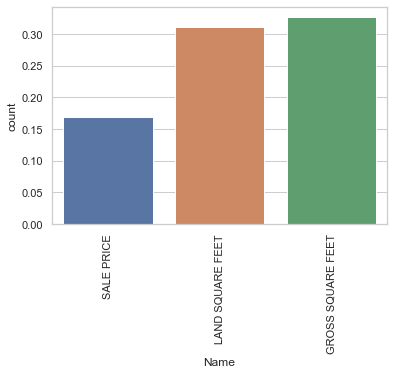

In [16]:
#plot the missing values
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Name', y='count',data=Val_missing)
plt.xticks(rotation=90)
sns
# AS I can see numerous of missing values in the graph so I 
# decided to take the mean of the missing values column to fill 
# the missing values.

#### Filling the null values with mean 

In [17]:
dnew['LAND SQUARE FEET']=dnew['LAND SQUARE FEET'].fillna(dnew['LAND SQUARE FEET'].mean())
dnew['GROSS SQUARE FEET']=dnew['GROSS SQUARE FEET'].fillna(dnew['GROSS SQUARE FEET'].mean())

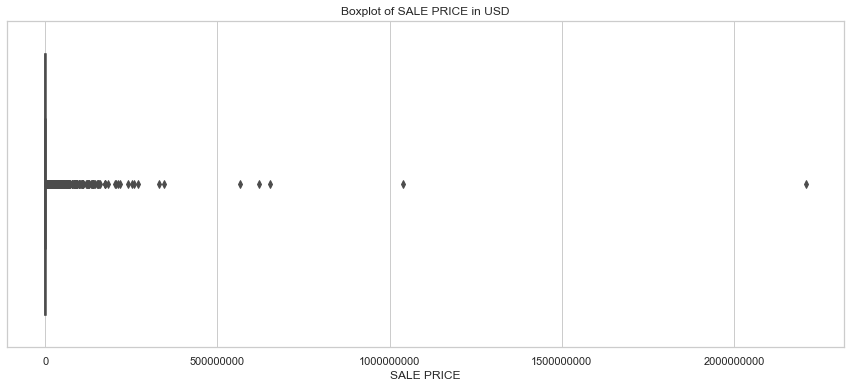

In [18]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=dnew)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Here I can see that the outliers are values greater than 500000000
There are an incredible amount of small ($0) observations here that need to be removed as they are not useful for analysis

In [19]:
data = dnew[(dnew['SALE PRICE'] > 100000) & (dnew['SALE PRICE'] < 5000000)]

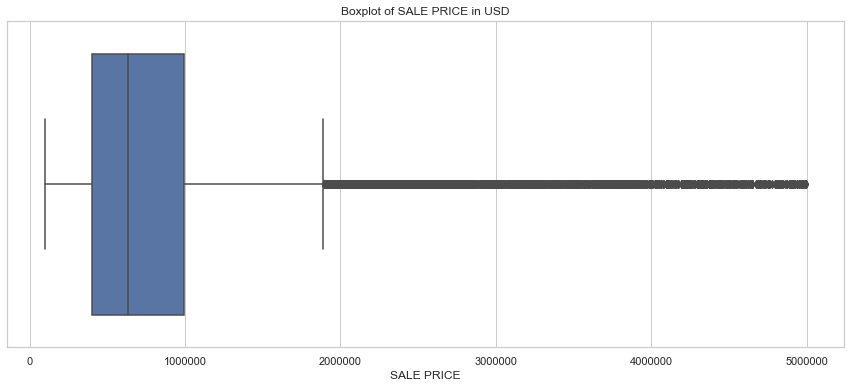

In [20]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

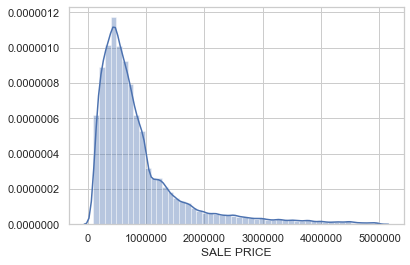

In [21]:
sns.distplot(data['SALE PRICE'])
# As i can see that it is highly righly skewed so I'll use 
# log transform so that it gives better results.

0.198994620445416


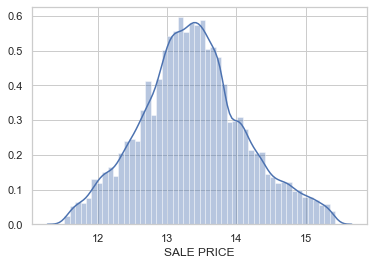

In [22]:
sales=np.log(data['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

Thus, now it is normalised. This is better but still not normalized. Applying a log transformation will normalize our target variable and assist our future models.

Now our target variable is much more normalized.

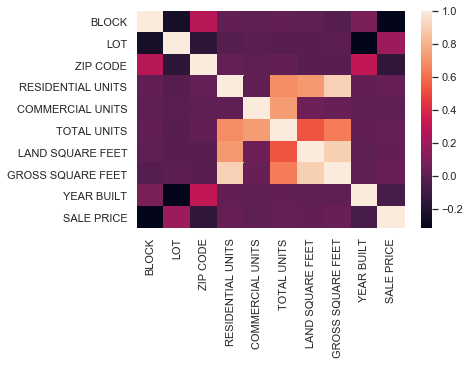

In [23]:
#correlation between the features
corr = data.corr()
sns.heatmap(corr)

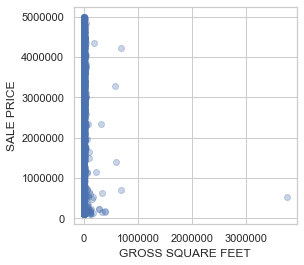

In [24]:
plt.figure(figsize=(4,4))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

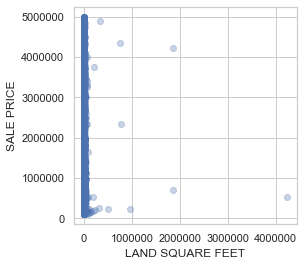

In [25]:
plt.figure(figsize=(4,4))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

We are seeing a similar issue with these two independent features. There are many extreme observations that can be removed to normalize our data.

In [26]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

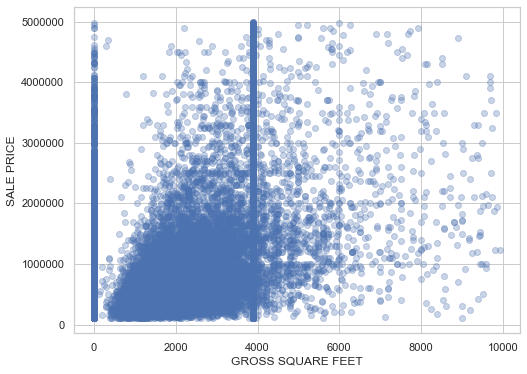

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

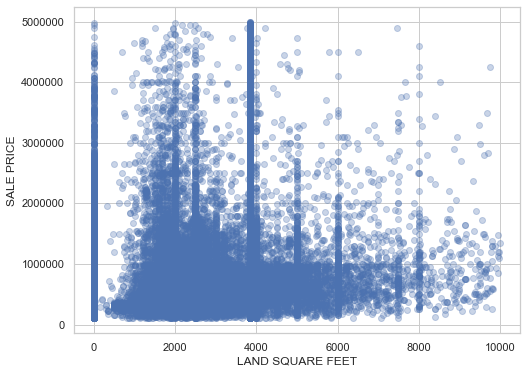

In [28]:
plt.figure(figsize=(8,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

Total Units, Commercial Units, Residential Units

In [29]:
data[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

TOTAL UNITS  SALE PRICE
1             1       24582
0             0       15493
2             2        9480
3             3        2721
4             4         695
6             6         360
5             5         170
8             8         133
7             7          70
9             9          56
10           10          44
12           12          16
11           11           9
16           16           9
14           14           5
15           15           5
13           13           4
17           18           1
18           19           1
19           20           1
20         2261           1

Removing rows with TOTAL UNITS == 0 and one outlier with 2261 units

In [30]:
data = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] != 2261)] 

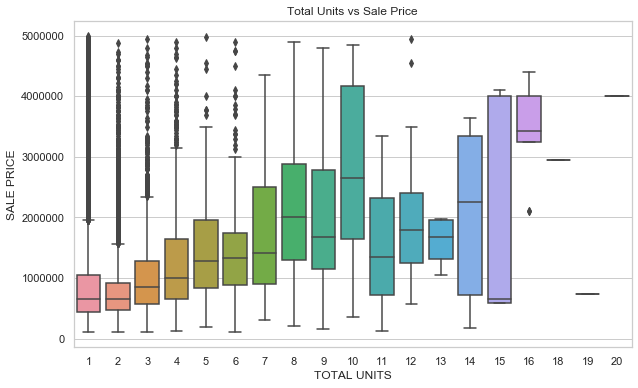

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data)
plt.title('Total Units vs Sale Price')
plt.show()

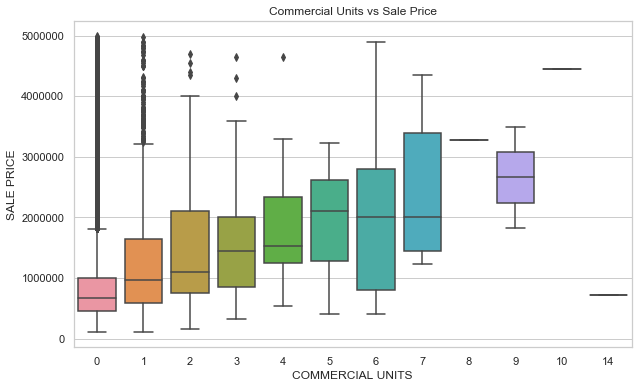

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)
plt.title('Commercial Units vs Sale Price')
plt.show()

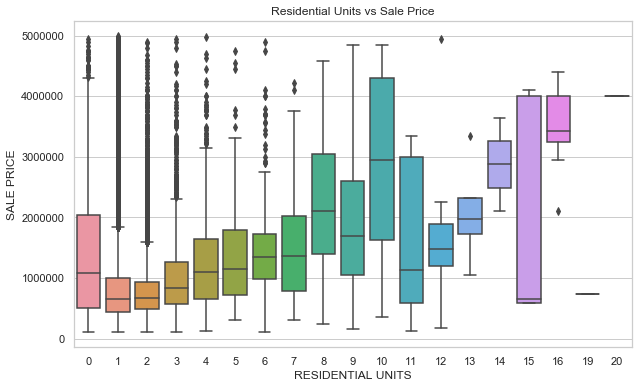

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)
plt.title('Residential Units vs Sale Price')
plt.show()

There is a linear increase of sale price as you increase the amount of residential units up until 10 at which the sale price distributions vary greatly. This is due to a lack of data for units > 10.

In [34]:
cat_data=data.select_dtypes(exclude=[np.number])
cat_data.describe()

BOROUGH    NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
count     38362           38362                                        38362   
unique        5             247                                           36   
top           4  FLUSHING-NORTH  01 ONE FAMILY DWELLINGS                       
freq      12607            1675                                        12220   

       TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT             ADDRESS  \
count                 38362                     38362               38362   
unique                    9                       104               30426   
top                       1                        R4  131-05 40TH   ROAD   
freq                  23990                      8920                 209   

       APARTMENT NUMBER  TAX CLASS AT TIME OF SALE  \
count             38362                      38362   
unique             2642                          3   
top                                              1   
freq              26410                      25220   

       BUILDING CLASS AT TIME OF SALE         SALE DATE  
count                           38362             38362  
unique                            104               322  
top                                R4  22-12-2016 00:00  
freq                             8924               259

TAX CLASS AT TIME OF SALE

In [35]:
# # Starting with TAX CLASS AT PRESENT
# data['TAX CLASS AT PRESENT'].unique()

In [36]:
# pivot=data.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
# pivot

In [37]:
# pivot.plot(kind='bar', color='black')

In [38]:
#  TAX CLASS AT TIME OF SALE
data['TAX CLASS AT TIME OF SALE'].unique()

[2, 4, 1]
Categories (3, int64): [2, 4, 1]

In [39]:
pivot=data.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot


SALE PRICE
TAX CLASS AT TIME OF SALE            
1                            582437.5
2                            990000.0
4                           1041598.0

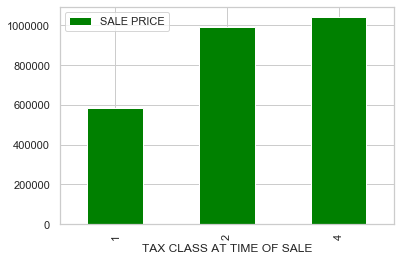

In [40]:
pivot.plot(kind='bar', color='green')

BOROUGH: Manhattan: 1, Bronx: 2, Brooklyn: 3, Queens: 4, Staten Island: 5 

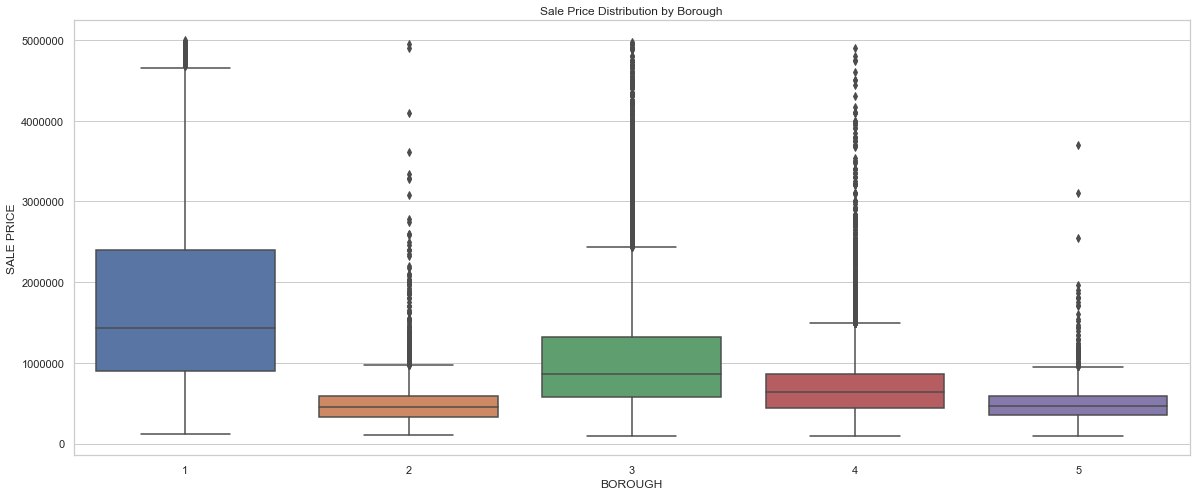

In [41]:
plt.subplots(figsize=(20,8))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

From this figure, there is a much wider distribution of sale prices in borough 1 compared to the other 4 boroughs. Much like in the sale price vs residential units figure, there is not much data for borough 1.

As i can see that max sales price is of Borough == 1 i.e. Manhattan

BUILDING CLASS CATEGORY

From the above graph I got the insight that 08 Rentals Elevator Apartments are the most costly.

Text(0.5, 1.0, 'Sales per Borough')

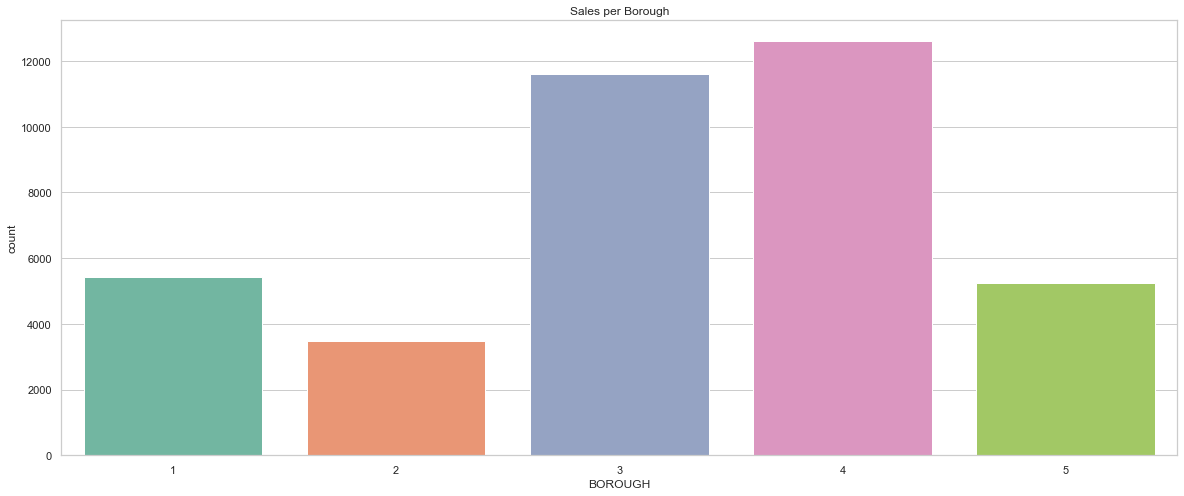

In [42]:
plt.subplots(figsize=(20,8))
sns.countplot('BOROUGH',data=data,palette='Set2')
plt.title('Sales per Borough')

From the above graph i got the insight that in 3 i.e Brooklyn maximum number of houses were sold.

In [43]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [44]:
from collections import Counter
NEIGHBORHOOD = list(dict(Counter(data.NEIGHBORHOOD).most_common(20)).keys())

avg_sale_prices = []
for i in NEIGHBORHOOD:
    avg_price = np.mean(data.SALE_PRICE[data.NEIGHBORHOOD == i])
    avg_sale_prices.append(avg_price)

In [45]:
data.head()

BOROUGH   NEIGHBORHOOD                      BUILDING_CLASS_CATEGORY  \
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
76       1  ALPHABET CITY  12 CONDOS - WALKUP APARTMENTS                 
79       1  ALPHABET CITY  13 CONDOS - ELEVATOR APARTMENTS               
80       1  ALPHABET CITY  13 CONDOS - ELEVATOR APARTMENTS               

   TAX_CLASS_AT_PRESENT  BLOCK   LOT BUILDING_CLASS_AT_PRESENT  \
3                    2B    402    21                        C4   
6                    2B    406    32                        C4   
76                    2    386  1002                        R2   
79                    2    373  1003                        R4   
80                    2    373  1004                        R4   

                  ADDRESS APARTMENT_NUMBER  ZIP_CODE  RESIDENTIAL_UNITS  \
3     154 EAST 7TH STREET                      10009                 10   
6            210 AVENUE B                      10009                  8   
76  211 EAST 3RD   STREET               1B     10009                  1   
79    324 EAST 4TH STREET               3A     10009                  1   
80    324 EAST 4TH STREET               3B     10009                  1   

    COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  \
3                  0           10       2272.000000        6794.000000   
6                  0            8       1750.000000        4226.000000   
76                 0            1       3854.481179        3894.415813   
79                 0            1       3854.481179        3894.415813   
80                 0            1       3854.481179        3894.415813   

    YEAR_BUILT TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
3         1913                         2                             C4   
6         1920                         2                             C4   
76           0                         2                             R2   
79        1920                         2                             R4   
80        1920                         2                             R4   

    SALE_PRICE         SALE_DATE  
3    3936272.0  23-09-2016 00:00  
6    3192840.0  23-09-2016 00:00  
76    620000.0  30-12-2016 00:00  
79    762669.0  21-09-2016 00:00  
80    772851.0  12-09-2016 00:00

From the above insight i could tell that TRIBECA is the most expensive neighbourhood

In [46]:
del data['ADDRESS']
del data['APARTMENT_NUMBER']

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38362 entries, 3 to 84545
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         38362 non-null  category
 1   NEIGHBORHOOD                    38362 non-null  object  
 2   BUILDING_CLASS_CATEGORY         38362 non-null  object  
 3   TAX_CLASS_AT_PRESENT            38362 non-null  category
 4   BLOCK                           38362 non-null  int64   
 5   LOT                             38362 non-null  int64   
 6   BUILDING_CLASS_AT_PRESENT       38362 non-null  object  
 7   ZIP_CODE                        38362 non-null  int64   
 8   RESIDENTIAL_UNITS               38362 non-null  int64   
 9   COMMERCIAL_UNITS                38362 non-null  int64   
 10  TOTAL_UNITS                     38362 non-null  int64   
 11  LAND_SQUARE_FEET                38362 non-null  float64 
 12  GROSS_SQUARE_FEET 

In [48]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

BLOCK           LOT      ZIP_CODE  RESIDENTIAL_UNITS  \
count  38362.000000  38362.000000  38362.000000       38362.000000   
mean    4691.017335    470.256452  10904.545019           1.512982   
std     3733.693267    718.169066    620.930557           1.096668   
min        1.000000      1.000000      0.000000           0.000000   
25%     1532.000000     28.000000  10312.000000           1.000000   
50%     4019.000000     62.000000  11214.000000           1.000000   
75%     6799.000000   1030.000000  11360.000000           2.000000   
max    16319.000000   9106.000000  11694.000000          20.000000   

       COMMERCIAL_UNITS   TOTAL_UNITS  LAND_SQUARE_FEET  GROSS_SQUARE_FEET  \
count      38362.000000  38362.000000      38362.000000       38362.000000   
mean           0.059694      1.581826       2785.890307        2227.791120   
std            0.341483      1.139081       1548.540523        1406.649683   
min            0.000000      1.000000          0.000000           0.000000   
25%            0.000000      1.000000       1942.000000        1280.000000   
50%            0.000000      1.000000       2600.000000        1977.000000   
75%            0.000000      2.000000       3854.481179        3840.000000   
max           14.000000     20.000000       9996.000000        9926.000000   

         YEAR_BUILT    SALE_PRICE  
count  38362.000000  3.836200e+04  
mean    1828.529821  9.186460e+05  
std      478.783303  7.653314e+05  
min        0.000000  1.007000e+05  
25%     1920.000000  4.585000e+05  
50%     1940.000000  6.800000e+05  
75%     1987.000000  1.054378e+06  
max     2017.000000  4.996841e+06

In [49]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'SALE_PRICE'],
      dtype='object')

In [50]:
data.head()

BOROUGH   NEIGHBORHOOD                      BUILDING_CLASS_CATEGORY  \
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
76       1  ALPHABET CITY  12 CONDOS - WALKUP APARTMENTS                 
79       1  ALPHABET CITY  13 CONDOS - ELEVATOR APARTMENTS               
80       1  ALPHABET CITY  13 CONDOS - ELEVATOR APARTMENTS               

   TAX_CLASS_AT_PRESENT  BLOCK   LOT BUILDING_CLASS_AT_PRESENT  ZIP_CODE  \
3                    2B    402    21                        C4     10009   
6                    2B    406    32                        C4     10009   
76                    2    386  1002                        R2     10009   
79                    2    373  1003                        R4     10009   
80                    2    373  1004                        R4     10009   

    RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  \
3                  10                 0           10       2272.000000   
6                   8                 0            8       1750.000000   
76                  1                 0            1       3854.481179   
79                  1                 0            1       3854.481179   
80                  1                 0            1       3854.481179   

    GROSS_SQUARE_FEET  YEAR_BUILT TAX_CLASS_AT_TIME_OF_SALE  \
3         6794.000000        1913                         2   
6         4226.000000        1920                         2   
76        3894.415813           0                         2   
79        3894.415813        1920                         2   
80        3894.415813        1920                         2   

   BUILDING_CLASS_AT_TIME_OF_SALE  SALE_PRICE         SALE_DATE  
3                              C4   3936272.0  23-09-2016 00:00  
6                              C4   3192840.0  23-09-2016 00:00  
76                             R2    620000.0  30-12-2016 00:00  
79                             R4    762669.0  21-09-2016 00:00  
80                             R4    772851.0  12-09-2016 00:00

In [51]:
#Dropping few columns
del data['BUILDING_CLASS_AT_PRESENT']
del data['BUILDING_CLASS_AT_TIME_OF_SALE']
del data['NEIGHBORHOOD']


In [52]:
del data['SALE_DATE']


In [53]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING_CLASS_CATEGORY','TAX_CLASS_AT_PRESENT','TAX_CLASS_AT_TIME_OF_SALE']

In [54]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38362 entries, 3 to 84545
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_1                                                             38362 non-null  uint8
 1   BOROUGH_2                                                             38362 non-null  uint8
 2   BOROUGH_3                                                             38362 non-null  uint8
 3   BOROUGH_4                                                             38362 non-null  uint8
 4   BOROUGH_5                                                             38362 non-null  uint8
 5   BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS                       38362 non-null  uint8
 6   BUILDING_CLASS_CATEGORY_02 TWO FAMILY DWELLINGS                       38362 non-null  uint8
 7   BUILDING_CLAS

In [56]:
# Replacing categorical columns with dummies
fdf = data.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [57]:
fdf.head()

BLOCK   LOT  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  \
3     402    21     10009                 10                 0           10   
6     406    32     10009                  8                 0            8   
76    386  1002     10009                  1                 0            1   
79    373  1003     10009                  1                 0            1   
80    373  1004     10009                  1                 0            1   

    LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  SALE_PRICE  ...  \
3        2272.000000        6794.000000        1913   3936272.0  ...   
6        1750.000000        4226.000000        1920   3192840.0  ...   
76       3854.481179        3894.415813           0    620000.0  ...   
79       3854.481179        3894.415813        1920    762669.0  ...   
80       3854.481179        3894.415813        1920    772851.0  ...   

    TAX_CLASS_AT_PRESENT_2  TAX_CLASS_AT_PRESENT_2A  TAX_CLASS_AT_PRESENT_2B  \
3                        0                        0                        1   
6                        0                        0                        1   
76                       1                        0                        0   
79                       1                        0                        0   
80                       1                        0                        0   

    TAX_CLASS_AT_PRESENT_2C  TAX_CLASS_AT_PRESENT_3  TAX_CLASS_AT_PRESENT_4  \
3                         0                       0                       0   
6                         0                       0                       0   
76                        0                       0                       0   
79                        0                       0                       0   
80                        0                       0                       0   

    TAX_CLASS_AT_TIME_OF_SALE_1  TAX_CLASS_AT_TIME_OF_SALE_2  \
3                             0                            1   
6                             0                            1   
76                            0                            1   
79                            0                            1   
80                            0                            1   

    TAX_CLASS_AT_TIME_OF_SALE_3  TAX_CLASS_AT_TIME_OF_SALE_4  
3                             0                            0  
6                             0                            0  
76                            0                            0  
79                            0                            0  
80                            0                            0  

[5 rows x 66 columns]

In [58]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38362 entries, 3 to 84545
Data columns (total 66 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   BLOCK                                                                 38362 non-null  int64  
 1   LOT                                                                   38362 non-null  int64  
 2   ZIP_CODE                                                              38362 non-null  int64  
 3   RESIDENTIAL_UNITS                                                     38362 non-null  int64  
 4   COMMERCIAL_UNITS                                                      38362 non-null  int64  
 5   TOTAL_UNITS                                                           38362 non-null  int64  
 6   LAND_SQUARE_FEET                                                      38362 non-null  float64


In [59]:
# del fdf['LAND_SQUARE_FEET']
# del fdf['GROSS_SQUARE_FEET']

In [60]:
Y_fdf = fdf['SALE_PRICE']
X_fdf = fdf.drop('SALE_PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((38362, 65), (38362,))

In [61]:
X_train ,X_test, y_train , y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.3 , random_state =34)

In [62]:
# Training set
X_train.shape , y_train.shape

((26853, 65), (26853,))

In [63]:
#Testing set
X_test.shape , y_test.shape

((11509, 65), (11509,))

### Applying First Machine Learning Model: Random Forest Regression

In [71]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
'''Get Predictions'''
y_pred1 = rf_regr.predict(X_test)

print("Random Forest Regression:\n")
print("RSS: {}".format(((y_test-y_pred1)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred1)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred1)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
print("Accuracy: "+ str(rf_regr.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred1)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred1) / y_test)) * 100)),2)



Random Forest Regression:

RSS: 2126889268065621.5
Mean absolute error: 243239.2514641288
Mean squared error: 184802265015.69394
Root Mean Squared Error: 429886.33964769566
Accuracy: 68.2004301198393%
R Squared: 0.682004301198393
Adjusted R Squared: 0.6802259260914982
Mean Absolute Percentage Error(MAPE): 33.0 2


In [73]:
error_saleprop2 = pd.DataFrame({
        'Actual Values': np.round(np.array(y_test).flatten(),2),
        'Predicted Values': np.round(y_pred1.flatten(),2)}).head(10)

error_saleprop2

Actual Values  Predicted Values
0       735000.0        1182125.00
1       572400.0         703577.97
2      1500000.0        1198903.60
3       308852.0         273985.48
4       265000.0         390859.10
5       800000.0         926977.28
6       260000.0         382924.77
7      1850000.0        1610070.37
8      1122862.0         934903.72
9       482000.0         458725.10

In [74]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_saleprop2.index, y=error_saleprop2['Predicted Values']),
    go.Bar(name='Actual', x=error_saleprop2.index, y=error_saleprop2['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

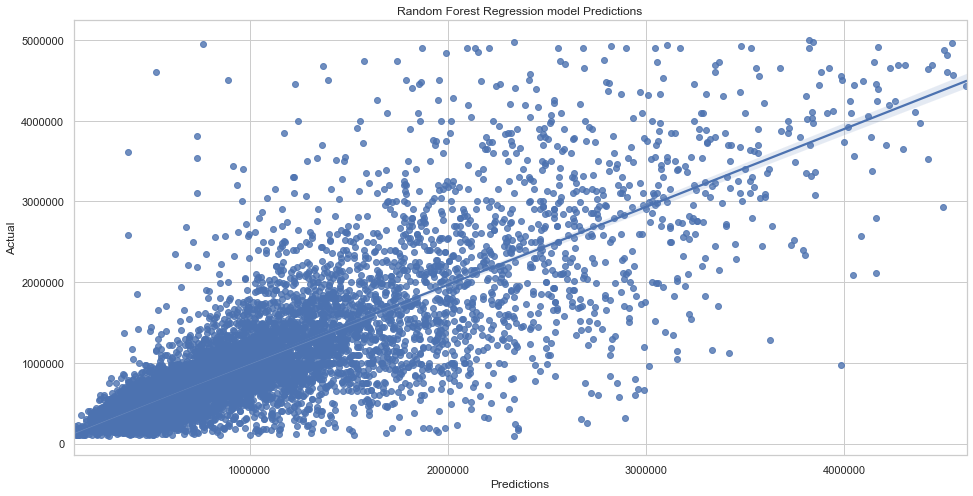

In [75]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred1,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Random Forest Regression model Predictions")
plt.show()

### Residual plot to check for homoscedasticity

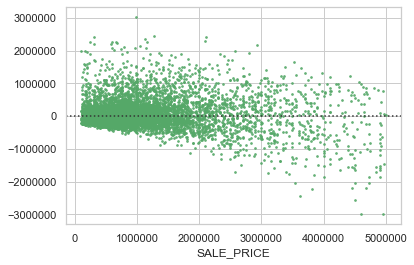

In [76]:
sns.residplot(y_test, y_pred1, color="g", scatter_kws={"s": 3})

### Applying Second Machine Learning Model: Decision Tree Regression

In [77]:
dc_regr = DecisionTreeRegressor()
dc_regr.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [78]:
'''Get Predictions'''
y_pred2 = dc_regr.predict(X_test)

print("Decision Tree Regression:\n")
print("RSS: {}".format(((y_test-y_pred2)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred2)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred2)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
print("Accuracy: "+ str(dc_regr.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred2)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred2) / y_test)) * 100)),2)



Decision Tree Regression:

RSS: 3496076409304418.0
Mean absolute error: 309139.6924725577
Mean squared error: 303768912095.2661
Root Mean Squared Error: 551152.3492604074
Accuracy: 47.72942449177515%
R Squared: 0.4772942449177515
Adjusted R Squared: 0.47437103901725663
Mean Absolute Percentage Error(MAPE): 40.0 2


In [79]:
error_saleprop3 = pd.DataFrame({
        'Actual Values': np.round(np.array(y_test).flatten(),2),
        'Predicted Values': np.round(y_pred2.flatten(),2)}).head(10)

error_saleprop3

Actual Values  Predicted Values
0       735000.0         1695000.0
1       572400.0          529490.0
2      1500000.0         1345360.0
3       308852.0          154500.0
4       265000.0          510000.0
5       800000.0         1325000.0
6       260000.0          619000.0
7      1850000.0         2500000.0
8      1122862.0         1083660.0
9       482000.0          470000.0

In [80]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_saleprop3.index, y=error_saleprop3['Predicted Values']),
    go.Bar(name='Actual', x=error_saleprop3.index, y=error_saleprop3['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

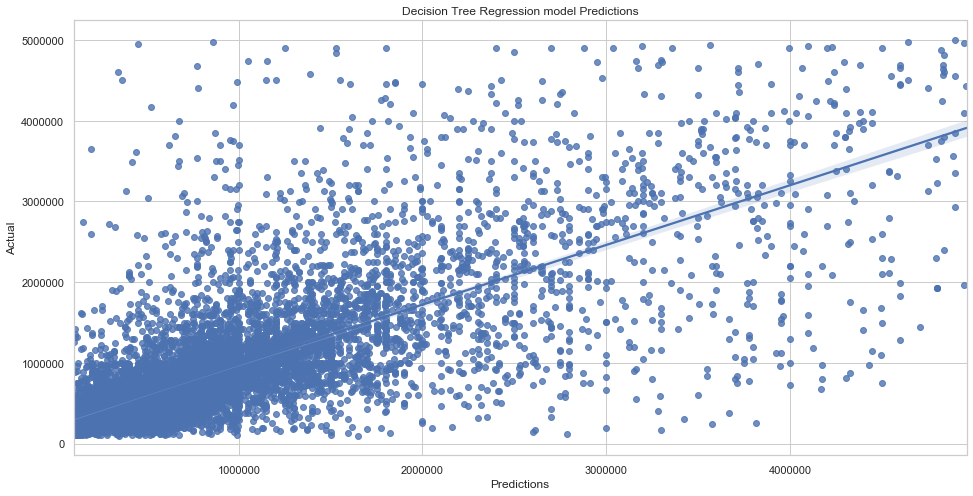

In [81]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Decision Tree Regression model Predictions")
plt.show()

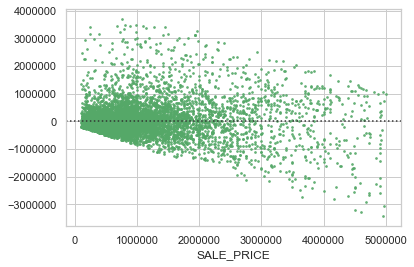

In [82]:
sns.residplot(y_test, y_pred2, color="g", scatter_kws={"s": 3})

### Applying Third Machine Learning Model Linear Regression just to check if the Random Forest Regression model is the better one here or not

In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
'''Get Predictions'''
y_pred = linreg.predict(X_test)

print("Linear Regression:\n")
print("RSS: {}".format(((y_test-y_pred)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Accuracy: "+ str(linreg.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)),2)


Linear Regression:

RSS: 4152407364565556.0
Mean absolute error: 379996.4672355844
Mean squared error: 360796538757.97687
Root Mean Squared Error: 600663.4155315078
Accuracy: 37.91648199885396%
R Squared: 0.37916481998853957
Adjusted R Squared: 0.3756928301667348
Mean Absolute Percentage Error(MAPE): 54.0 2


In [85]:
error_saleprop1 = pd.DataFrame({
        'Actual Values': np.round(np.array(y_test).flatten(),2),
        'Predicted Values': np.round(y_pred.flatten(),2)}).head(10)

error_saleprop1

Actual Values  Predicted Values
0       735000.0        1733944.18
1       572400.0        1239132.94
2      1500000.0         826287.45
3       308852.0         407322.65
4       265000.0         535545.20
5       800000.0        1225288.66
6       260000.0         404730.31
7      1850000.0        1772885.56
8      1122862.0         869738.01
9       482000.0        -101538.01

In [86]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_saleprop1.index, y=error_saleprop1['Predicted Values']),
    go.Bar(name='Actual', x=error_saleprop1.index, y=error_saleprop1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

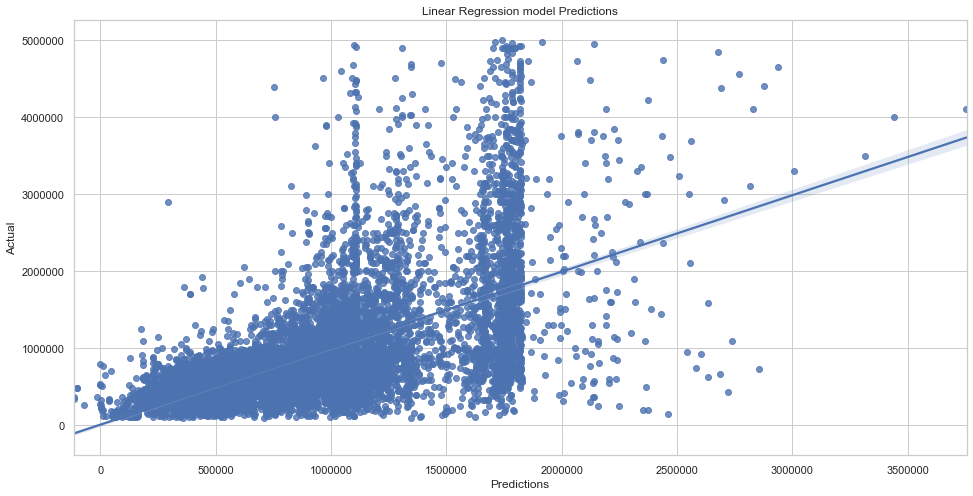

In [87]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Regression model Predictions")
plt.show()

### Residual plot to check for homoscedasticity

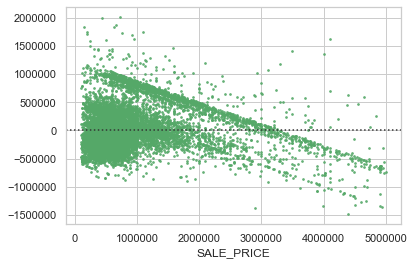

In [88]:
sns.residplot(y_test, y_pred, color="g", scatter_kws={"s": 3})